In [109]:
import importlib
from library import data_preprocess as dp
import matplotlib.pyplot as plt
importlib.reload(dp)
import pickle

In [110]:
file_path1 = "./data/author-quote.txt"
file_path2 = "./data/quotes_all.csv"
file_path3 = "./data/crowdtruth_proverbs.pickle"

In [111]:
quotes1 = list(set(dp.load_data(file_path1, header=False, sep='\t')[1].values))
print(len(quotes1))
print(quotes1[:2])

36159
["I don't know what leadership is. You can't touch it. You can't feel it. It's not tangible. But I do know this: you recognize it when you see it.", 'I believe alien life is quite common in the universe, although intelligent life is less so. Some say it has yet to appear on planet Earth.']


In [112]:
quotes2 = list(set(dp.load_data(file_path2, header=True, sep=';')["QUOTE"]))
print(len(quotes2))
print(quotes2[:2])

61071
['Magnanimous people have no vanity, they have no jealousy, and they feed on the true and the solid wherever they find it. And, what is more, they find it everywhere.', "I don't know what leadership is. You can't touch it. You can't feel it. It's not tangible. But I do know this: you recognize it when you see it."]


In [113]:
with open(file_path3, 'rb') as pickleFile:
    quotes3 = pickle.load(pickleFile)
    quotes3 = list(set(quotes3))
print(len(quotes3))
print(quotes3[:2])

1019
['He Smells Best That Smells Of Nothing', 'Easier Said Than Done']


In [114]:
quotes = quotes1
quotes.extend(quotes2)
quotes.extend(quotes3)
quotes = list(set(quotes))
print(len(quotes))
print(quotes[:2])

90019
["I'm terrified of bugs and I travel with sprays, lotions, potions the lot. I have to check the room before I go to sleep and if I come across a bug and fail to remove it I have to sleep in a separate room as I'm paranoid that I'll be taken advantage of as I sleep.", "I don't know what leadership is. You can't touch it. You can't feel it. It's not tangible. But I do know this: you recognize it when you see it."]


In [115]:
unique_chars = dp.get_unique_chars(quotes)
print(len(unique_chars))
print(unique_chars)

88
[' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '=', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '£', 'Â', 'â', '”', '€', '™']


In [87]:
dp.get_char_presence(quotes)

Number of sentences containing each char is,
{' ': 90019, '!': 1452, '"': 8, '#': 5, '$': 148, '%': 101, '&': 62, "'": 37355, '(': 133, ')': 139, '*': 4, '+': 5, ',': 54194, '-': 11056, '.': 87913, '/': 126, '0': 2245, '1': 2197, '2': 1303, '3': 792, '4': 678, '5': 941, '6': 618, '7': 499, '8': 586, '9': 896, ':': 2481, ';': 2040, '=': 7, '?': 2919, 'A': 15365, 'B': 8410, 'C': 5887, 'D': 4033, 'E': 4650, 'F': 4530, 'G': 4981, 'H': 5544, 'I': 47185, 'J': 2109, 'K': 1159, 'L': 4417, 'M': 8826, 'N': 5000, 'O': 4642, 'P': 5103, 'Q': 212, 'R': 2867, 'S': 9180, 'T': 23280, 'U': 1728, 'V': 1215, 'W': 13138, 'X': 78, 'Y': 5268, 'Z': 137, 'a': 88790, 'b': 64007, 'c': 74702, 'd': 81209, 'e': 89750, 'f': 72721, 'g': 72782, 'h': 85573, 'i': 88186, 'j': 11766, 'k': 47145, 'l': 83349, 'm': 77446, 'n': 88486, 'o': 89115, 'p': 65696, 'q': 5608, 'r': 87411, 's': 88140, 't': 89013, 'u': 79087, 'v': 59699, 'w': 70813, 'x': 11654, 'y': 75113, 'z': 5700, '£': 4, '—': 1, '’': 1}


In [116]:
print("Total number of quotes = ", len(quotes))
filter_quotes = dp.filter_data(quotes, "^[a-zA-Z !\"',.?\-\:\*]+$")
print(len(filter_quotes))
print(filter_quotes[:10])

Total number of quotes =  90019
83449
["I'm terrified of bugs and I travel with sprays, lotions, potions the lot. I have to check the room before I go to sleep and if I come across a bug and fail to remove it I have to sleep in a separate room as I'm paranoid that I'll be taken advantage of as I sleep.", "I don't know what leadership is. You can't touch it. You can't feel it. It's not tangible. But I do know this: you recognize it when you see it.", "Although I'm a business major out of McGill University, I know nothing... but then I found out much later in life, nobody knows anything.", 'Death does not concern us, because as long as we exist, death is not here. And when it does come, we no longer exist.', "I've never been a big believer in formal education.", "When you're teaching a hard concept and the students all have puzzled looks on their faces and then suddenly you can see that 'aha' moment, that they got it, that's just an incredible thing.", 'Happiness: a way station between t

In [117]:
special_chars = [' ', '!', '"', "'", '*', ',', '-', '.', ':', '?']
clean_quotes = dp.clean_data(quotes, "^[a-zA-Z !\"'*,\-.:?]+$", special_chars)

unique_chars = dp.get_unique_chars(clean_quotes)
print(len(unique_chars))
print(unique_chars)

clean_quotes = dp.tokenize(clean_quotes)

print(len(clean_quotes))
print(clean_quotes[:2])

# stats of number of tokens in the sentence
dp.get_len_stats(clean_quotes)

36
[' ', '!', '"', "'", '*', ',', '-', '.', ':', '?', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
83449
[['im', 'terrified', 'of', 'bugs', 'and', 'i', 'travel', 'with', 'sprays', ',', 'lotions', ',', 'potions', 'the', 'lot', '.', 'i', 'have', 'to', 'check', 'the', 'room', 'before', 'i', 'go', 'to', 'sleep', 'and', 'if', 'i', 'come', 'across', 'a', 'bug', 'and', 'fail', 'to', 'remove', 'it', 'i', 'have', 'to', 'sleep', 'in', 'a', 'separate', 'room', 'as', 'im', 'paranoid', 'that', 'ill', 'be', 'taken', 'advantage', 'of', 'as', 'i', 'sleep', '.'], ['i', 'dont', 'know', 'what', 'leadership', 'is', '.', 'you', 'cant', 'touch', 'it', '.', 'you', 'cant', 'feel', 'it', '.', 'its', 'not', 'tangible', '.', 'but', 'i', 'do', 'know', 'this', ':', 'you', 'recognize', 'it', 'when', 'you', 'see', 'it', '.']]
min of length:  2
max of length:  108
average length:  27.53177389782981
mode of length:  14


In [118]:
MIN_NUM_TOKENS = 6
MAX_NUM_TOKENS = 60
clean_quotes = dp.filter_data_on_length(clean_quotes, MIN_NUM_TOKENS, MAX_NUM_TOKENS)
print(len(clean_quotes))

80019


In [119]:
word_freqs = dp.get_vocabulary(clean_quotes)

In [120]:
dp.get_vocabulary_stats(word_freqs)

Total vocabulary:  34401
average of frequency:  61.50861893549606
mode of frequency:  1


In [121]:
filtered_words = dp.filter_words(word_freqs, 20)
print("Number of filtered words = ", len(filtered_words))
sents = dp.get_sentences_with_words(clean_quotes, filtered_words)
print(len(sents))
print(sents[:5])

Number of filtered words =  5286
29423
[['death', 'does', 'not', 'concern', 'us', ',', 'because', 'as', 'long', 'as', 'we', 'exist', ',', 'death', 'is', 'not', 'here', '.', 'and', 'when', 'it', 'does', 'come', ',', 'we', 'no', 'longer', 'exist', '.'], ['ive', 'never', 'been', 'a', 'big', 'believer', 'in', 'formal', 'education', '.'], ['happiness', ':', 'a', 'way', 'station', 'between', 'too', 'little', 'and', 'too', 'much', '.'], ['i', 'dont', 'keep', 'up', 'with', 'twitter', 'all', 'day', 'long', '.'], ['no', 'matter', 'what', 'has', 'happened', ',', 'you', 'too', 'have', 'the', 'power', 'to', 'enjoy', 'yourself', '.']]


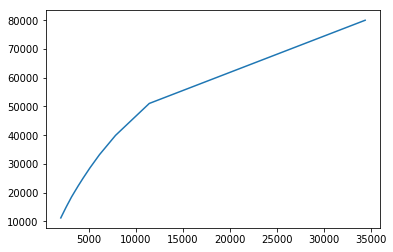

In [122]:
# Analysis for choosing optimum word freq cut off
freqsL = list(range(1, 80, 5))
num_words = []
num_sents = []
for x in freqsL:
    filtered_words = dp.filter_words(word_freqs, x)
    num_words.append(len(filtered_words))
    num_sents.append(len(dp.get_sentences_with_words(clean_quotes, filtered_words)))
plt.plot(num_words, num_sents)
plt.show()

In [130]:
# Considering only words which have a frequency of atleast 15 and the corresponding sentences
final_vocabulary = dp.filter_words(word_freqs, 10)
print("Number of filtered words = ", len(final_vocabulary))
final_clean_quotes = dp.get_sentences_with_words(clean_quotes, final_vocabulary)
print("Number of sentences: ", len(final_clean_quotes))

Number of filtered words =  8348
Number of sentences:  41731


In [131]:
# Let's append sos and eos tokens to all sentences
clean_quotes_final = [["sos"] + tokens + ["eos"] for tokens in final_clean_quotes]
clean_quotes_final = [' '.join(tokens) for tokens in clean_quotes_final]
vocabulary_final = final_vocabulary + ["sos", "eos"]
print("Final vocabulary size: ", len(vocabulary_final))
print("Number of sentences: ", len(clean_quotes_final))
print(clean_quotes_final[:2])
print(vocabulary_final[:10])

Final vocabulary size:  8350
Number of sentences:  41731
['sos i dont know what leadership is . you cant touch it . you cant feel it . its not tangible . but i do know this : you recognize it when you see it . eos', 'sos death does not concern us , because as long as we exist , death is not here . and when it does come , we no longer exist . eos']
['im', 'terrified', 'of', 'and', 'i', 'travel', 'with', ',', 'the', 'lot']


In [134]:
with open("./datasets/quotes.pickle","wb") as fop:
    pickle.dump(clean_quotes_final, fop)
    
with open("./datasets/quotes_vocabulary.pickle","wb") as fop:
    pickle.dump(vocabulary_final, fop)

In [133]:
print(clean_quotes_final[:5])

['sos i dont know what leadership is . you cant touch it . you cant feel it . its not tangible . but i do know this : you recognize it when you see it . eos', 'sos death does not concern us , because as long as we exist , death is not here . and when it does come , we no longer exist . eos', 'sos ive never been a big believer in formal education . eos', 'sos happiness : a way station between too little and too much . eos', 'sos i dont keep up with twitter all day long . eos']
